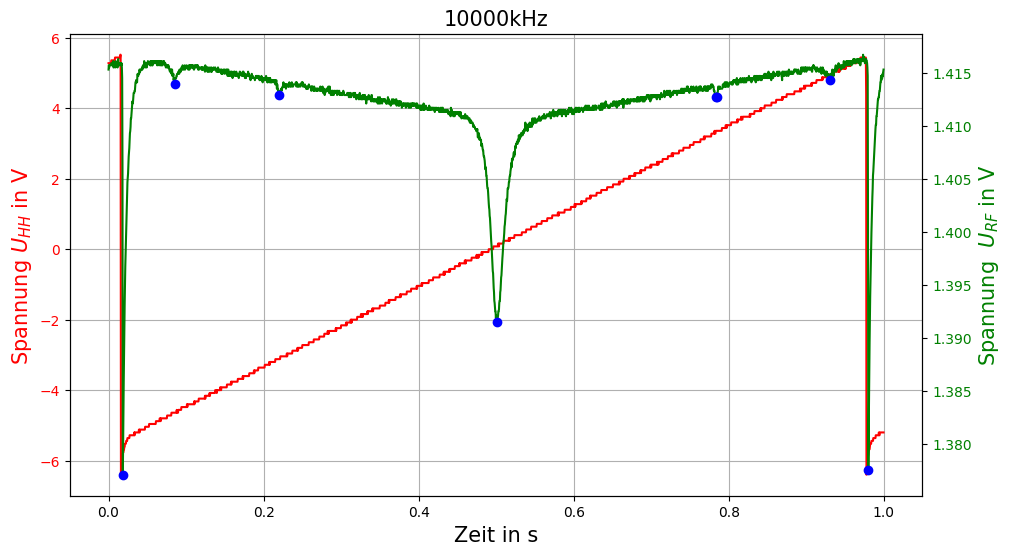

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from matplotlib.gridspec import GridSpec
import csv

class LandeFaktor:
    def __init__(self,path):
        self.path = path
        self.file = open(self.path)
        self.file = csv.reader(self.file,delimiter='\t')
        self.time = []
        self.channel1 = []
        self.channel2 =[]
        for line in self.file:
            self.time.append(float(line[0]))
            self.channel1.append(float(line[1]))
            self.channel2.append(float(line[2]))
        self.time = np.array(self.time)
        self.channel1 = np.array(self.channel1)
        self.channel2= np.array(self.channel2)

    def findpeaksauto(self):
        peaks = find_peaks(-self.channel2,prominence=0.001)
        return peaks

    def plotwithpeaks(self,peaks,findpeaks = False):
        if findpeaks:
            peaks,_ = self.findpeaksauto()
        fig = plt.figure(figsize=(11,6))
        gs = GridSpec(8,5)
        fig1 = fig.add_subplot(gs[:,:])
        fig1.set_title(str(self.path)[31:], fontsize = 15)

        fig1.set_xlabel('Zeit in s',fontsize = 15)
        fig1.set_ylabel(r'Spannung $U_{HH}$ in V',color = 'r', fontsize = 15)
        fig1.tick_params(axis='y',labelcolor='r')
        fig1.plot(self.time, self.channel1,'r-', label = 'Channel 1')
        fig1.grid(True)

        fig2 = fig1.twinx()
        fig2.set_ylabel(r'Spannung  $U_{RF}$ in V',color='g',fontsize=15)
        fig2.tick_params(axis='y',labelcolor = 'g')
        fig2.plot(self.time,self.channel2,'g',label='Channel 2')
        for peak in peaks:
            plt.plot(self.time[peak],self.channel2[peak],'bo')

lande2500 = LandeFaktor('230508_OptischesPumpen/Resonanz10000kHz')
peaks = [988,1076,1423,1512]
lande2500.plotwithpeaks(peaks,findpeaks=True)

In [142]:
print(float('0.0'))

0.0
